In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

Random map generation 



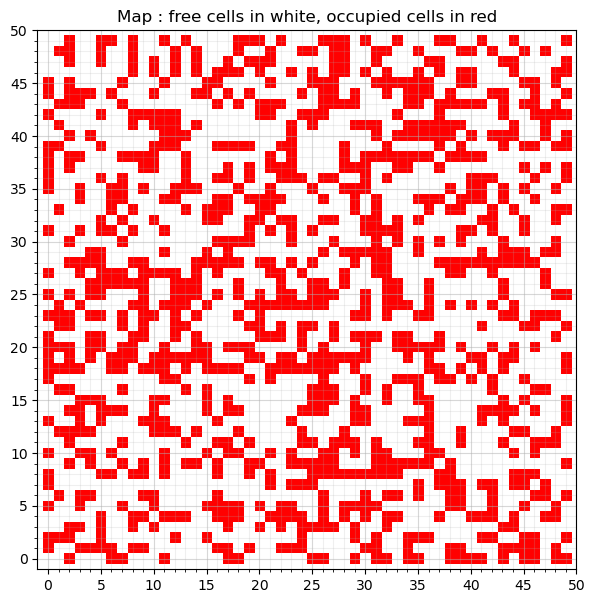

In [2]:
#Creating the grid
max_val = 50 # Size of the map

def create_empty_plot(max_val):
    """
    Helper function to create a figure of the desired dimensions & grid
    
    :param max_val: dimension of the map along the x and y dimensions
    :return: the fig and ax objects.
    """
    fig, ax = plt.subplots(figsize=(7,7))
    
    major_ticks = np.arange(0, max_val+1, 5)
    minor_ticks = np.arange(0, max_val+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_ylim([-1,max_val])
    ax.set_xlim([-1,max_val])
    ax.grid(True)
    
    return fig, ax

fig, ax = create_empty_plot(max_val)

# Creating the occupancy grid
np.random.seed(0) # To guarantee the same outcome on all computers
data = np.random.rand(max_val, max_val) * 20 # Create a grid of 50 x 50 random values
cmap = colors.ListedColormap(['white', 'red']) # Select the colors with which to display obstacles and free cells

# Converting the random values into occupied and free cells
limit = 12 
occupancy_grid = data.copy()
occupancy_grid[data>limit] = 1
occupancy_grid[data<=limit] = 0

# Displaying the map
ax.imshow(occupancy_grid.transpose(), cmap=cmap)
plt.title("Map : free cells in white, occupied cells in red");

## Implementing the A* OOP Algorithm


In [3]:
def _get_movements_4n():
    """
    Get all possible 4-connectivity movements (up, down, left right).
    :return: list of movements with cost [(dx, dy, movement_cost)]
    """
    return [(1, 0, 1.0),
            (0, 1, 1.0),
            (-1, 0, 1.0),
            (0, -1, 1.0)]

def _get_movements_8n():
    """
    Get all possible 8-connectivity movements. Equivalent to get_movements_in_radius(1)
    (up, down, left, right and the 4 diagonals).
    :return: list of movements with cost [(dx, dy, movement_cost)]
    """
    s2 = math.sqrt(2)
    return [(1, 0, 1.0),
            (0, 1, 1.0),
            (-1, 0, 1.0),
            (0, -1, 1.0),
            (1, 1, s2),
            (-1, 1, s2),
            (-1, -1, s2),
            (1, -1, s2)]

In [4]:
#def printNode(node, name):
#    print(name, "coord:", node.coord, "g:", node.g, "h:", node.h, "f:", node.f)

class Node():
    def __init__(self, coord, h_value):
        self.coord = coord  # Node position (x, y)
        self.g = float("inf")
        self.h = h_value
        self.f = self.g + self.h
        self.parent = None

    def __eq__(self, other):
        return self.coord == other.coord

    def __lt__(self, other):
        return self.f < other.f
        
    def __hash__(self):
        return hash(self.coord)

    def set_cost(self, cost):
        if cost < self.g:
            self.g = cost
            self.f = self.g + self.h

    def set_parent(self, parent):
        self.parent = parent

def reconstruct_path(node):
    path = []
    while node is not None:
        path.insert(0, node.coord)
        node = node.parent
    return path

def is_valid(coord, grid):
    return 0 <= coord[0] < grid.shape[0] and 0 <= coord[1] < grid.shape[1] and not grid[coord]

def A_Star_OOP(start, goal, h, coords, occupancy_grid, movement_type="4N", max_val=max_val): 
    for point in [start, goal]:
        for coord in point:
            assert coord>=0 and coord<max_val, "start or end goal not contained in the map"
    
    # check if start and goal nodes correspond to free spaces
    if occupancy_grid[start[0], start[1]]:
        raise Exception('Start node is not traversable')

    if occupancy_grid[goal[0], goal[1]]:
        raise Exception('Goal node is not traversable')

        
    # Initialization
    nodes = {index: Node(index, h[index]) for index in np.ndindex(occupancy_grid.shape)}
    start_node = nodes[start]
    goal_node = nodes[goal]
    start_node.set_cost(0)

    # The set of open nodes
    open_set = [start_node]
    # The set of visited nodes that no longer need to be expanded.
    closed_set = set()
    
    if movement_type == '4N':
        movements = _get_movements_4n()
    elif movement_type == '8N':
        movements = _get_movements_8n()
    else:
        raise ValueError('Unknown movement')
    

    
    while open_set:
        #the node in openSet having the lowest f score
        current_node = min(open_set, key=lambda node: node.f)
        
        #If the goal is reached, reconstruct and return the obtained path
        if current_node == goal_node:
            return reconstruct_path(current_node), closed_set

        open_set.remove(current_node)
        closed_set.add(current_node)

        #loop through neighbors
        for dx, dy, deltacost in movements:
            #get neighbor coordinates
            neighbor_coord = (current_node.coord[0] + dx, current_node.coord[1] + dy)

            #if outside of the grid or obstacle, skip
            if not is_valid(neighbor_coord, occupancy_grid):
                continue

            #get neighbor node
            neighbor_node = nodes[neighbor_coord]

            #if node already visited, skip
            if neighbor_node in closed_set:
                continue

            #calculate hypothetical g score
            tentative_gScore = current_node.g + deltacost


            if tentative_gScore < neighbor_node.g:
                neighbor_node.set_cost(tentative_gScore)
                neighbor_node.set_parent(current_node)

                #add neighbor to open_set
                if neighbor_node not in open_set:
                    open_set.append(neighbor_node)

                    

    print("No path found to goal")
    return [], closed_set


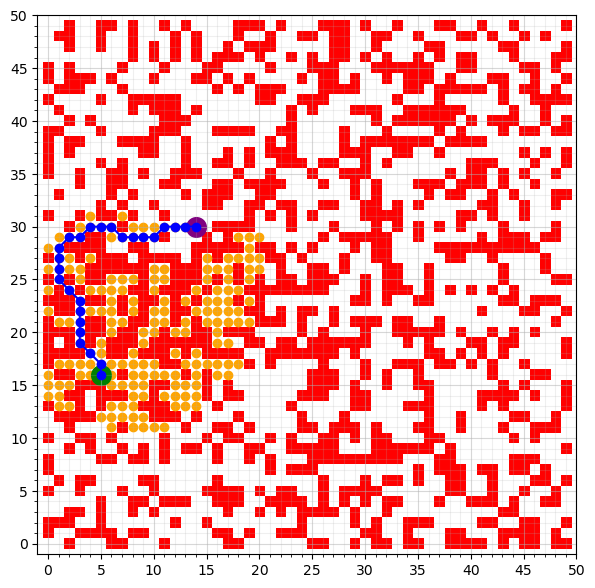

In [7]:
# Define the start and end goal
start = (5,16)
goal = (14,30)



# -----------------------------------------
# DO NOT EDIT THIS PORTION OF CODE - 
# EXECUTION AND PLOTTING OF THE ALGORITHM
# -----------------------------------------
    
    
# List of all coordinates in the grid
x,y = np.mgrid[0:max_val:1, 0:max_val:1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
pos = np.reshape(pos, (x.shape[0]*x.shape[1], 2))
coords = list([(int(x[0]), int(x[1])) for x in pos])

# Define the heuristic, here = distance to goal ignoring obstacles
h = np.linalg.norm(pos - goal, axis=-1)
h = dict(zip(coords, h))

# Run the A* algorithm
path, visitedNodes = A_Star_OOP(start, goal, h, coords, occupancy_grid, movement_type="8N")

############# CONVERTING LIST OF NODES INTO LIST OF COORDS FOR DISPLAYING###################
visitedNodes = [node.coord for node in visitedNodes]
############# FINISHED #####################################################################

path = np.array(path).reshape(-1, 2).transpose()
visitedNodes = np.array(visitedNodes).reshape(-1, 2).transpose()

# Displaying the map
fig_astar, ax_astar = create_empty_plot(max_val)
ax_astar.imshow(occupancy_grid.transpose(), cmap=cmap)

# Plot the best path found and the list of visited nodes
ax_astar.scatter(visitedNodes[0], visitedNodes[1], marker="o", color = 'orange');
ax_astar.plot(path[0], path[1], marker="o", color = 'blue');
ax_astar.scatter(start[0], start[1], marker="o", color = 'green', s=200);
ax_astar.scatter(goal[0], goal[1], marker="o", color = 'purple', s=200);